In [2]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Simulation Based Approach

* population: 1000 lottery tickets produced by Codeup
* parameter we interested: win rate. 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

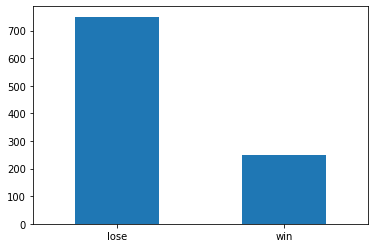

In [61]:
# Create the lottery ticket population: 250 wins and 750 loses

tickets = pd.Series([True]*250 + [False]*750)
tickets

# Visualize

tickets.value_counts().set_axis(['lose', 'win']).plot.bar()
plt.xticks(rotation=0)

In [4]:
# Take a random sample of 25 tickets

n=25
tickets.sample(n).mean()

0.32

In [5]:
# Use the list comprehension to generate the 5 random samples

[tickets.sample(n).mean() for _ in range(5)]

[0.28, 0.12, 0.24, 0.2, 0.24]

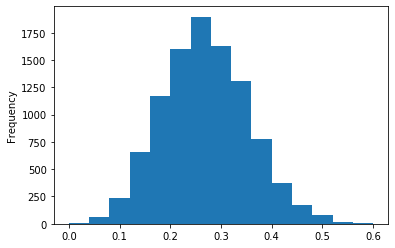

In [7]:
# Test Central Limit 

calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=15)

In [37]:
se = math.sqrt((0.25*0.75)/n)
se

0.08660254037844387

In [57]:
calculated_winrates.agg(['mean','std'])

mean    0.249700
std     0.085616
dtype: float64

In [59]:
# Calculate the p-value

mean = calculated_winrates.agg(['mean','std'])['mean']
std = calculated_winrates.agg(['mean','std'])['std']

stats.norm(mean, std).cdf(0.2)

0.2807899382069138

In [54]:
six_dice = np.random.randint(low=1, high=7, size=(1000000, 6))
six_dice = pd.DataFrame(six_dice)
six_dice['total'] = six_dice.mean(axis=1).round(1)
six_dice.sample(5)

,0,1,2,3,4,5,total
467889,5,6,4,1,6,1,3.8
295730,5,4,1,3,5,5,3.8
225397,4,6,1,2,2,3,3.0
875361,5,2,6,6,5,5,4.8
34932,6,3,6,6,4,2,4.5


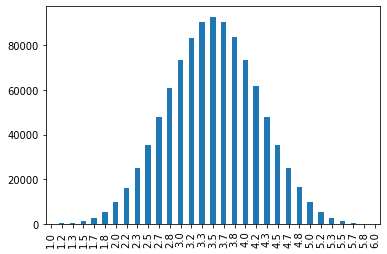

In [55]:
six_dice.total.value_counts().sort_index().plot(kind='bar')

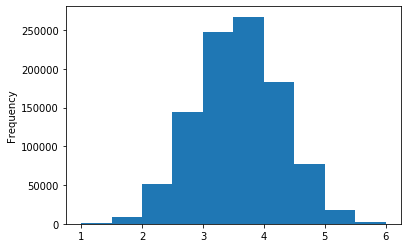

In [56]:
six_dice['total'].plot(kind='hist')

* H0: The average grades in web development are the same as the data science classes
* Ha: The average grades in web development are different as the data science classes

TN: H0 is true and we don't reject it. 
TP: Ha is true and we reject the H0
Type I: H0 is true but we reject the H0
Type II: H0 is false  but we didn't reject it. 

* H0: There is no relationship between how early a student shows up and their grade
* Ha: There is a relationship between how early a student shows up and their grade

* H0: Both Web dev and data science students are equally likely to be coffee drinkers
* Ha: One major is more likely to be coffee drinkers